✓ Survival analysis capabilities available
COMPREHENSIVE NSCLC RADIOGENOMIC ANALYSIS PIPELINE
This analysis combines advanced statistical methods with clear interpretations
for Non-Small Cell Lung Cancer radiogenomic data.
Results are suitable for both research publication and clinical interpretation.
Loading dataset...
Dataset loaded successfully: 211 patients, 40 variables

COMPREHENSIVE DATA PREPROCESSING
Cleaning and preparing dataset for analysis
--------------------------------------------------------------------------------
✓ Survival Status converted: 63 deaths, 148 alive
✓ Recurrence data: 54.0 with recurrence, 157.0 without

🧬 MOLECULAR MARKERS PROCESSING:
  • EGFR_Positive: 43.0/172 (25.0%) positive
  • KRAS_Positive: 38.0/171 (22.2%) positive
  • ALK_Positive: 0.0/155 (0.0%) positive

🏥 CLINICAL STAGING PROCESSING:
  • T stage: 156 patients with valid T staging
  • N stage: 162 patients with valid N staging

⏱ Survival data: 63 patients with survival time data

✅ PREPROCESS

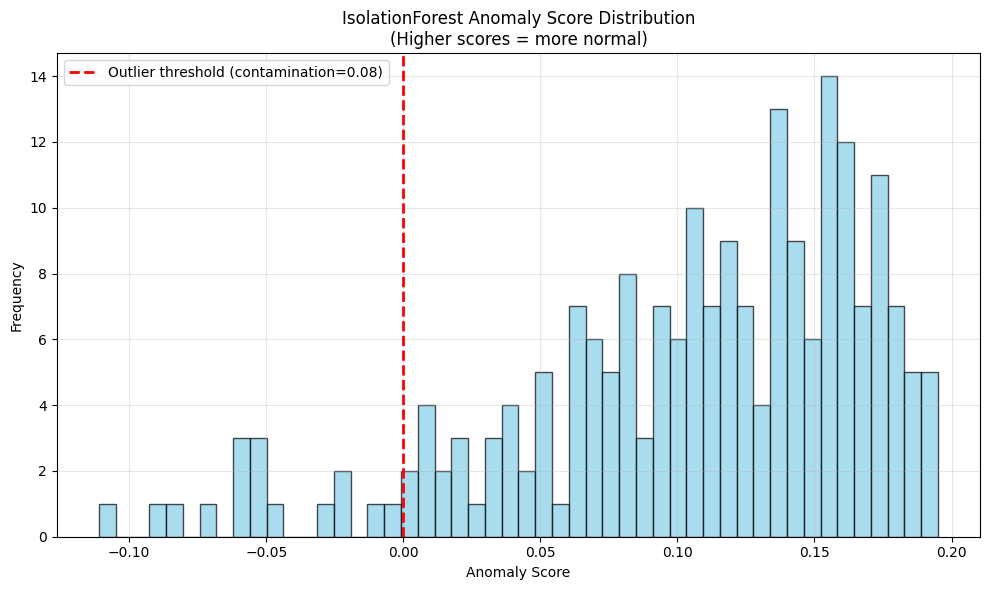


PATIENT CHARACTERISTICS ANALYSIS
Detailed overview of patient demographics and clinical features
--------------------------------------------------------------------------------


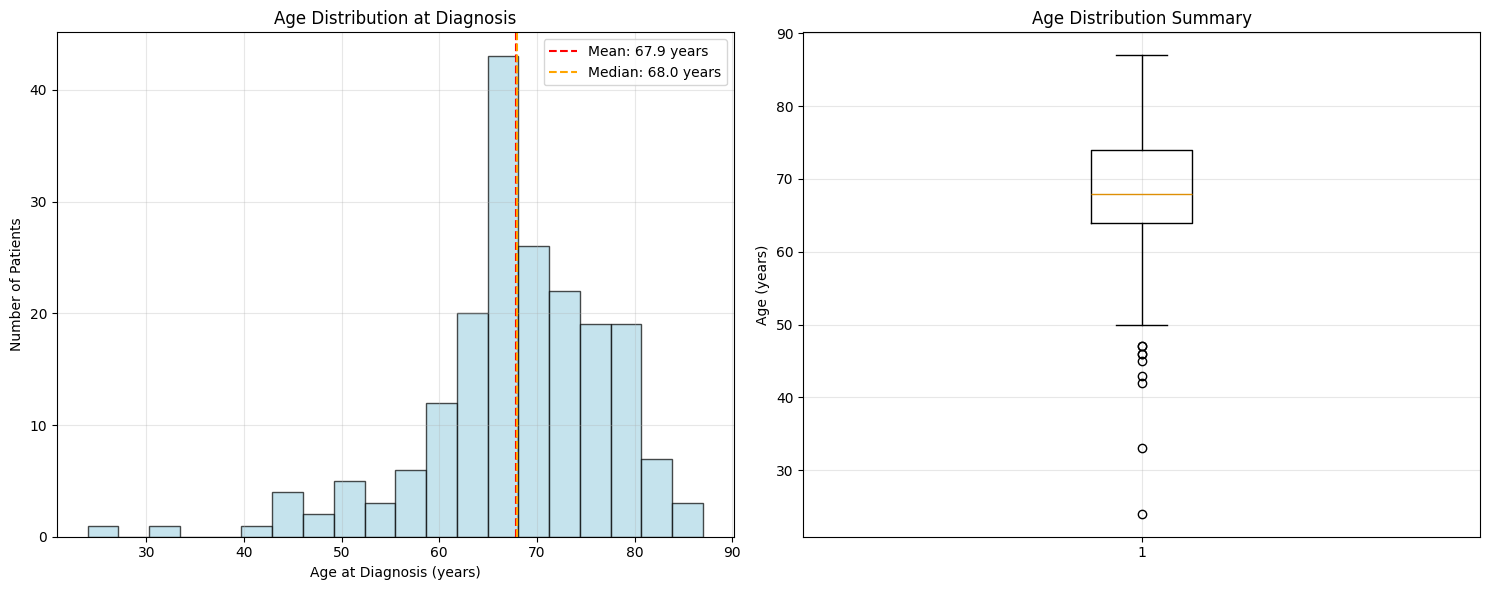

📊 Age Analysis:
   • Mean age: 67.9 ± 9.5 years
   • Age range: 24-87 years
   • Median age: 68.0 years


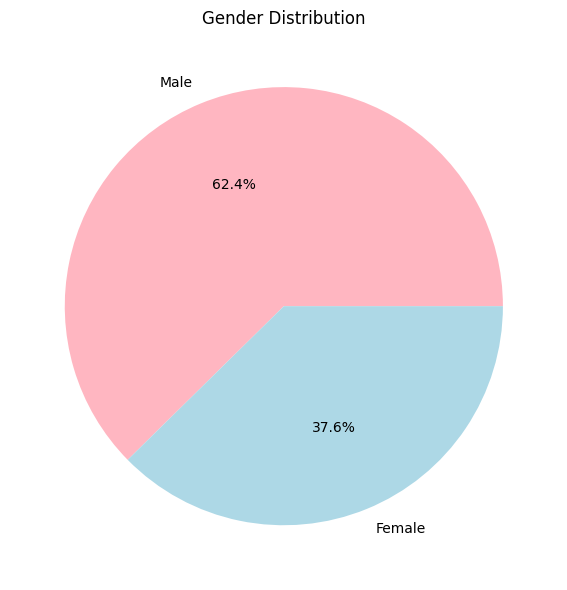


👥 Gender Distribution:
   • Male: 121 (62.4%)
   • Female: 73 (37.6%)


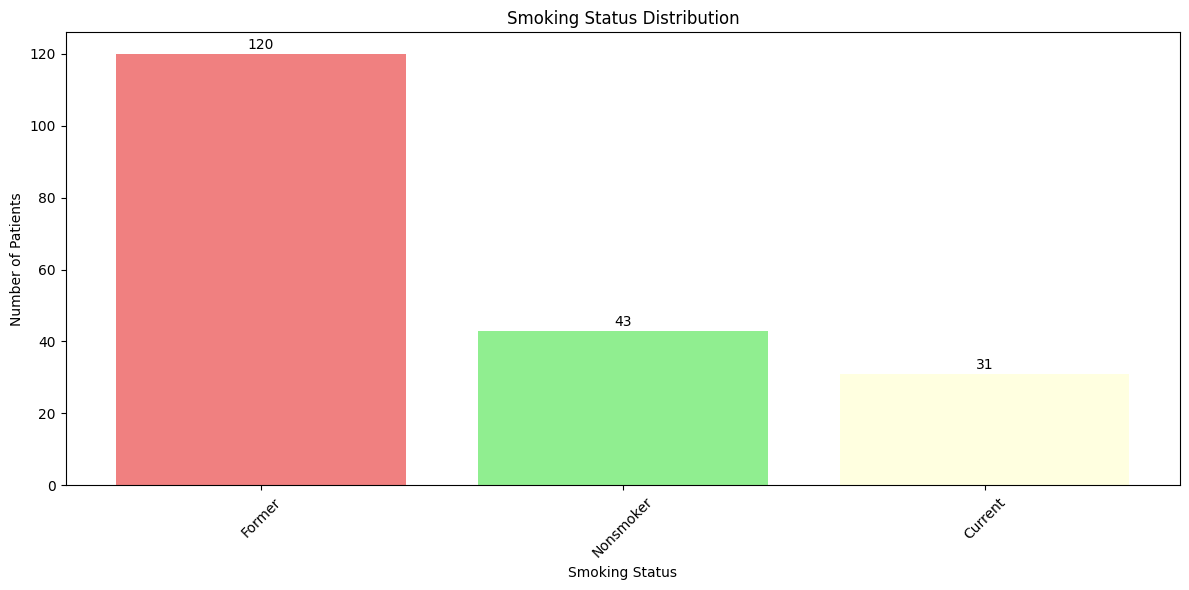


🚬 Smoking Status:
   • Former: 120 (61.9%)
   • Nonsmoker: 43 (22.2%)
   • Current: 31 (16.0%)

🧬 Molecular Marker Prevalence:
   • EGFR: 37.0/156 (23.7%)
   • KRAS: 32.0/156 (20.5%)
   • ALK: 0.0/142 (0.0%)


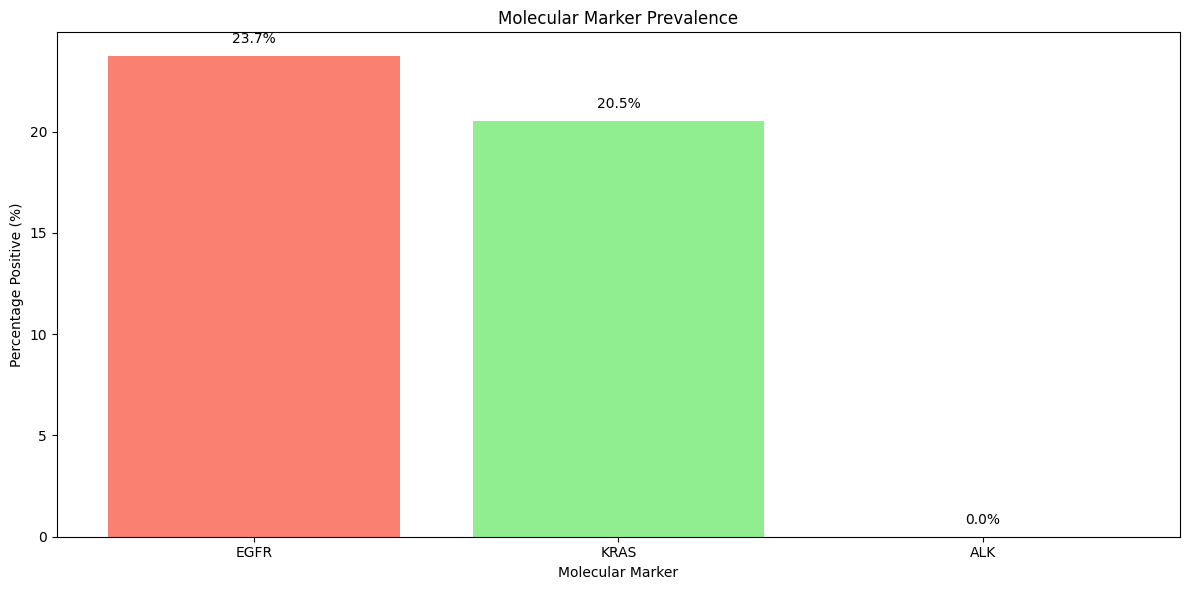


COMPREHENSIVE SURVIVAL ANALYSIS
Kaplan-Meier survival curves and statistical testing
--------------------------------------------------------------------------------
📊 Overall Survival Statistics:
   • Total patients: 50
   • Events (deaths): 50 (100.0%)
   • Median survival: 514 days
   • 1-year survival: 68.0%
   • 2-year survival: 40.0%
   • 3-year survival: 22.0%


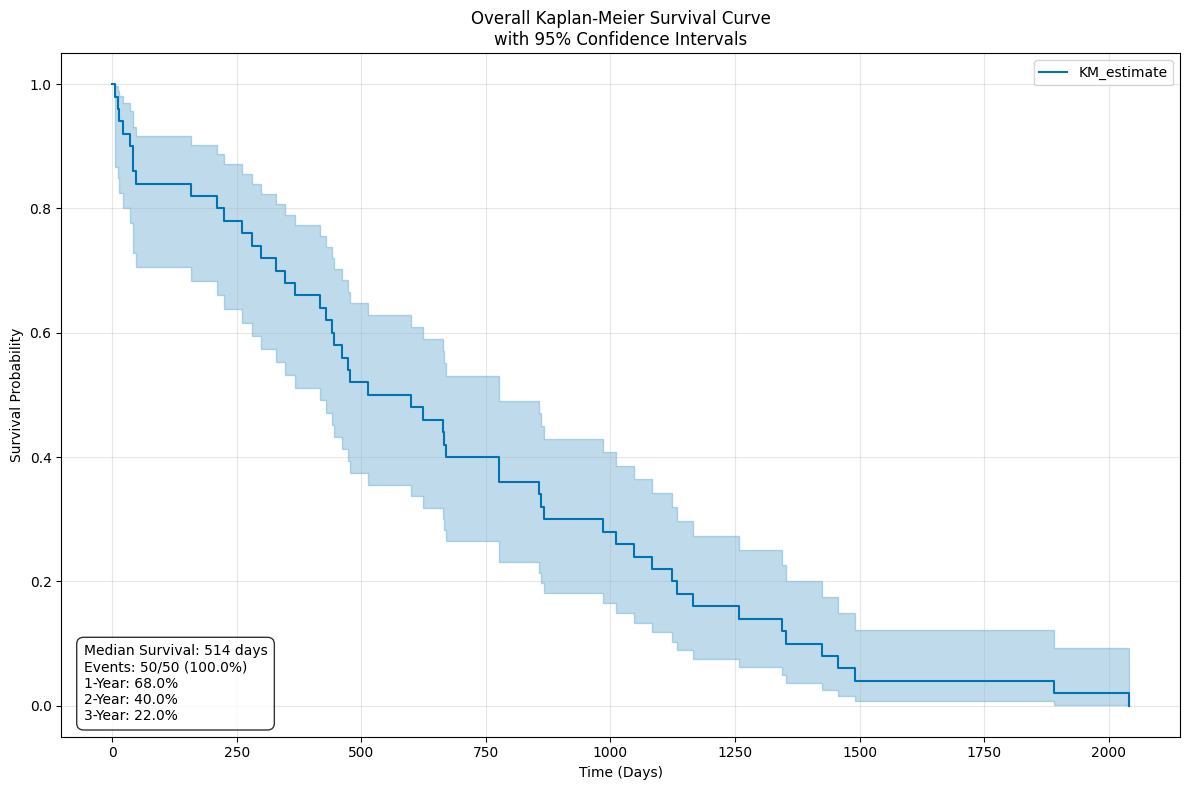


🧬 Survival by Molecular Markers:
   • KRAS: p = 0.1194


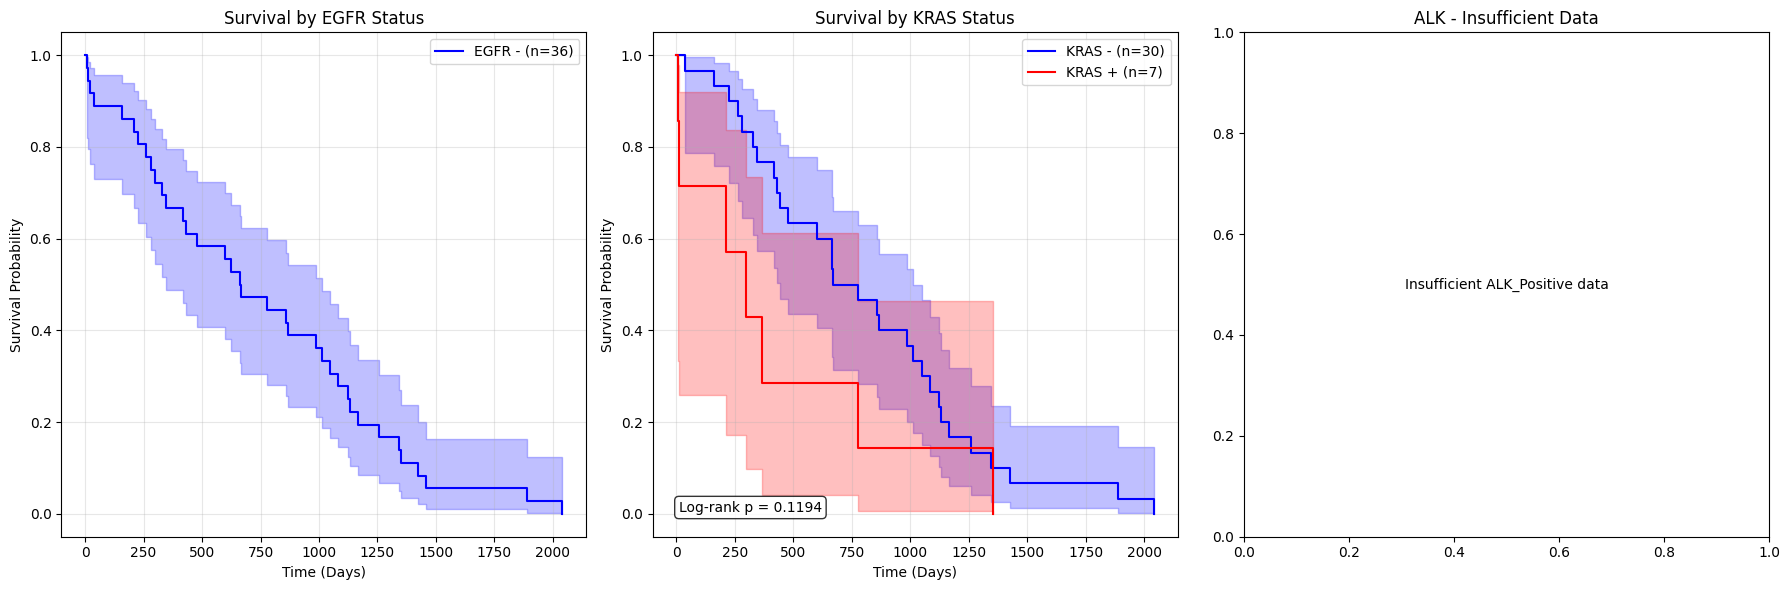


📈 Cox Proportional Hazards Analysis:
   ⚠ Could not perform Cox regression: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model

MOLECULAR CLUSTERING ANALYSIS
Identifying patient subgroups based on molecular and clinical features
--------------------------------------------------------------------------------
Optimal number of clusters: 4 (silhouette score: 0.442)


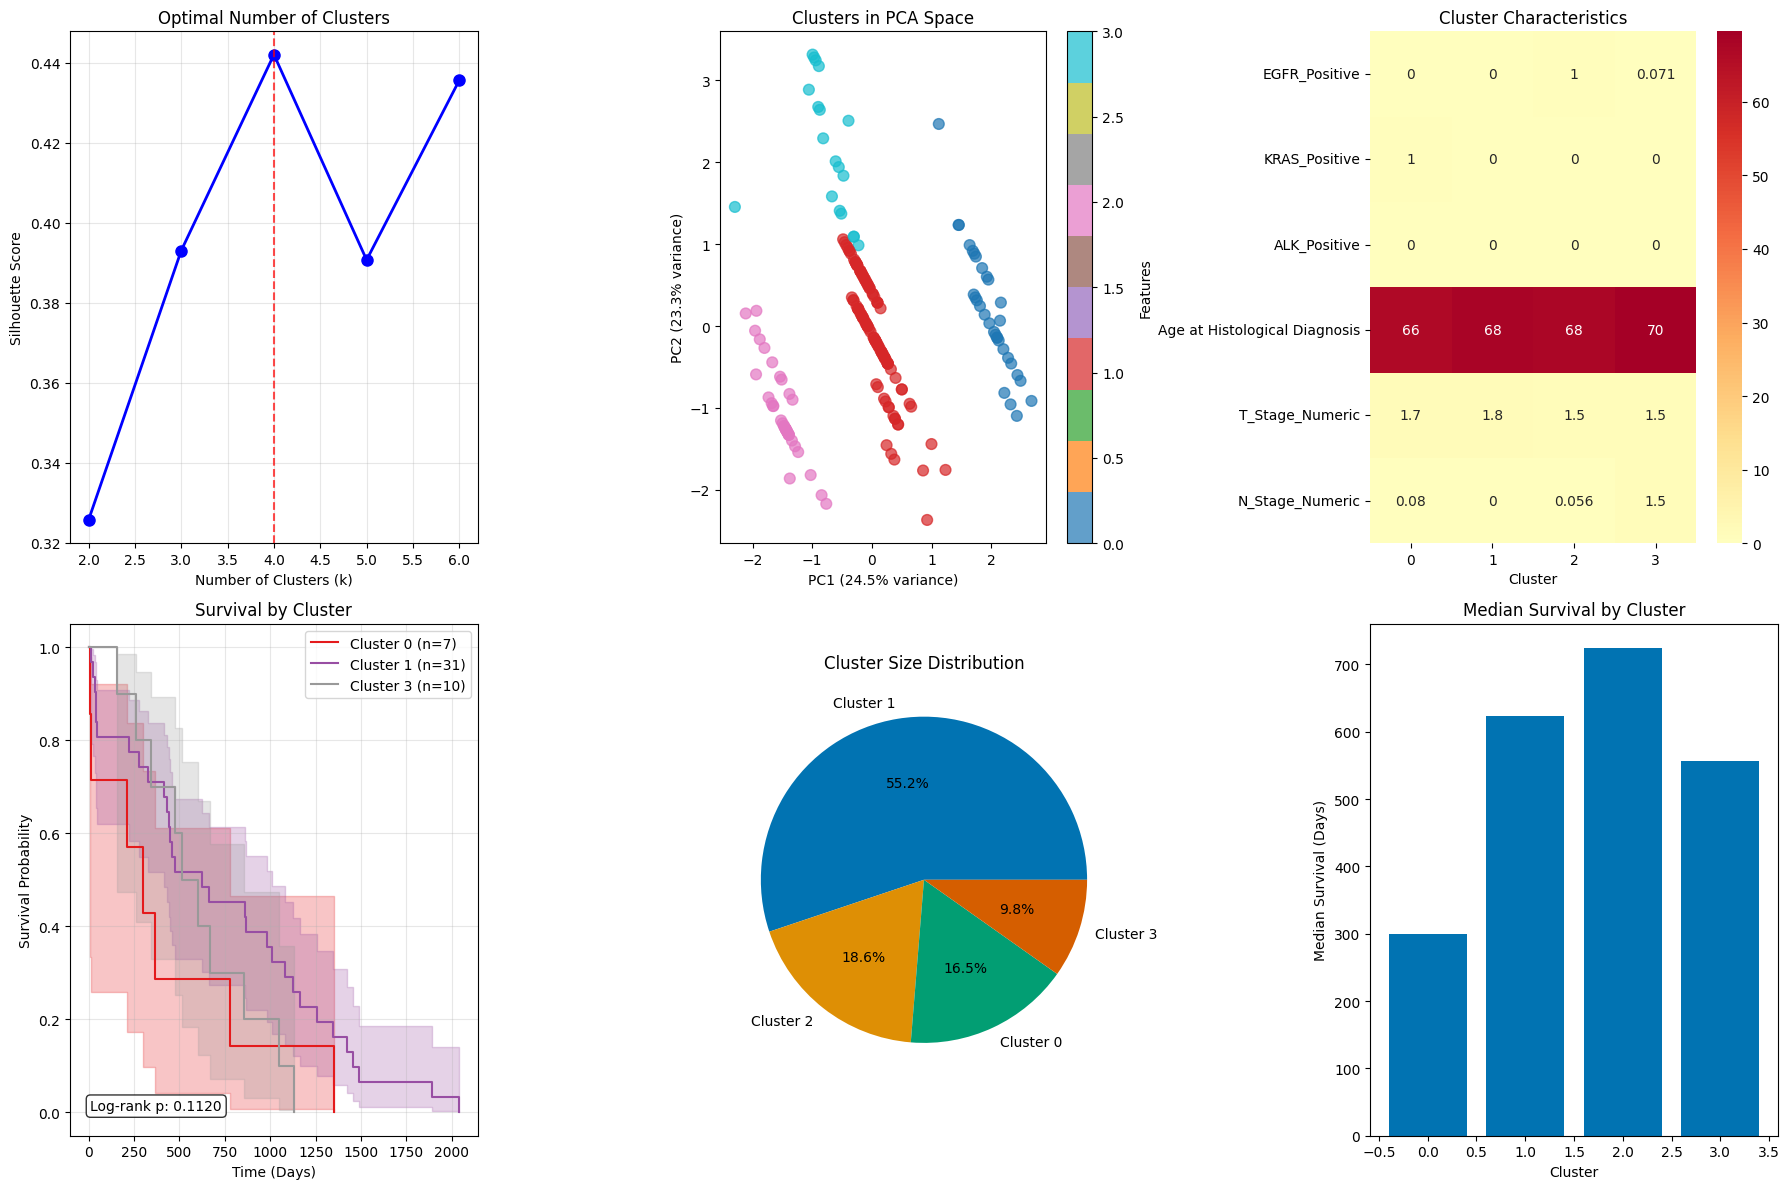


Cluster Analysis Results:
   Number of clusters: 4
   Patients clustered: 194

Cluster Characteristics:
         Count  EGFR_Positive  KRAS_Positive  ALK_Positive  Age at Histological Diagnosis  T_Stage_Numeric  N_Stage_Numeric
Cluster                                                                                                                    
0           32           0.00            1.0           0.0                          66.44             1.71             0.08
1          107           0.00            0.0           0.0                          68.13             1.79             0.00
2           36           1.00            0.0           0.0                          67.58             1.53             0.06
3           19           0.07            0.0           0.0                          69.58             1.53             1.47

PREDICTIVE MODELING ANALYSIS
Machine learning models to predict Death_Status
-------------------------------------------------------------------------

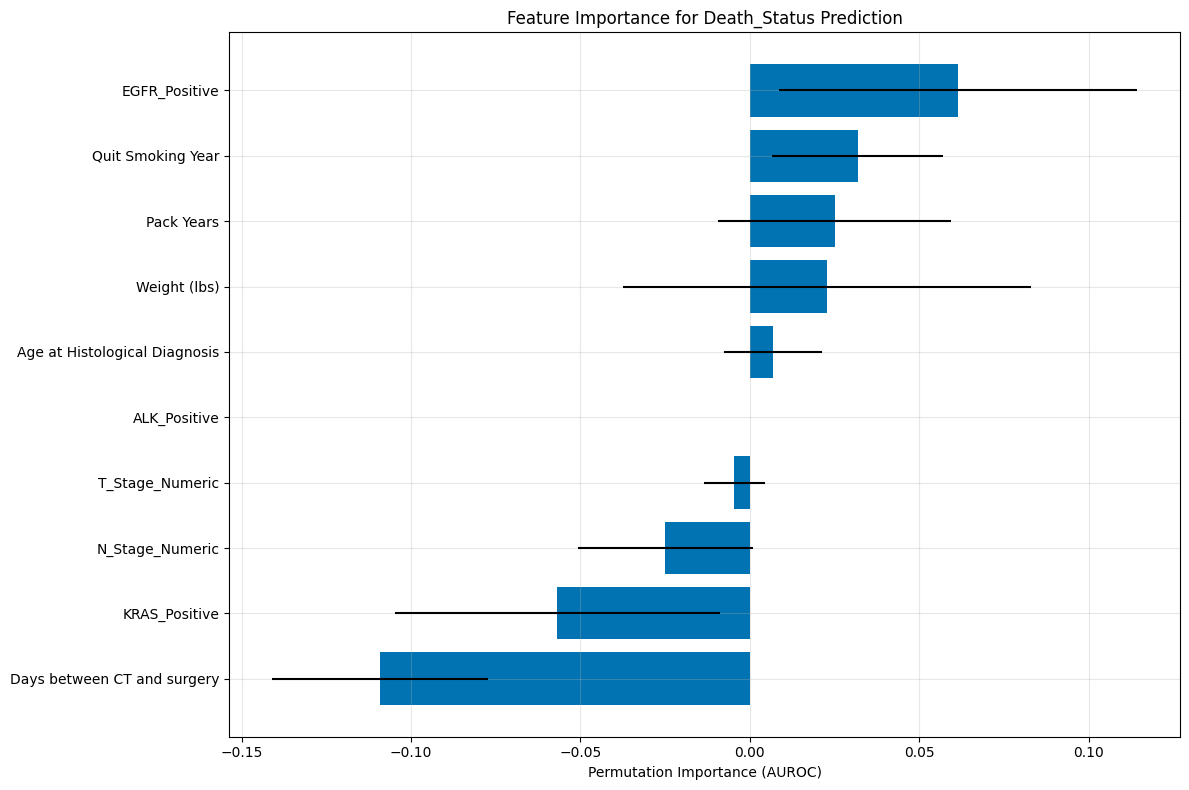

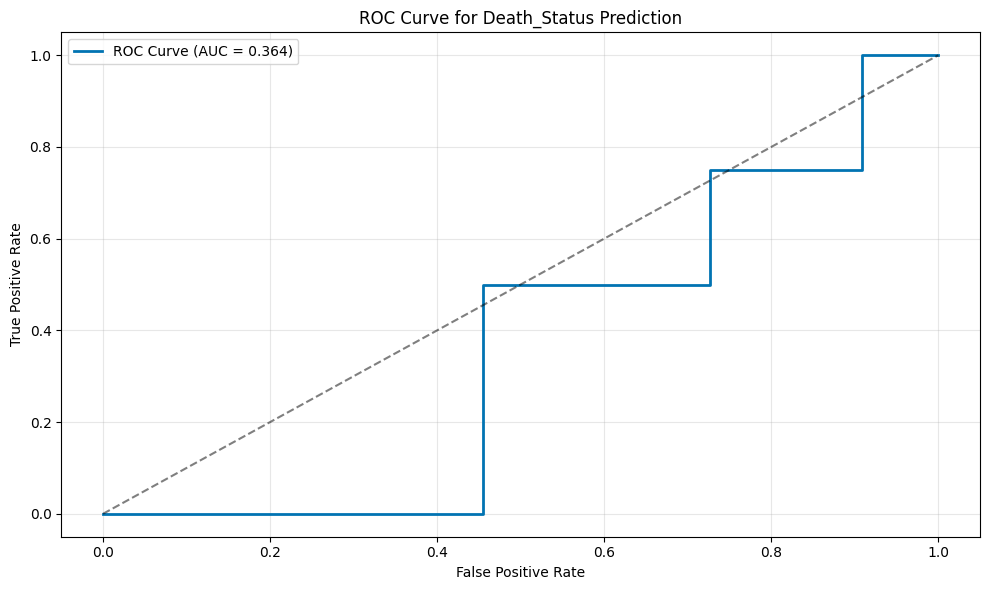


MOLECULAR NETWORK ANALYSIS
Analyzing interactions between molecular markers and clinical variables
--------------------------------------------------------------------------------
Analyzing network of 8 variables:
   Molecular: 3 variables
   Clinical: 5 variables
Network analysis parameters:
   Median sample size: 142
   Significance threshold: 0.05
   Total associations tested: 28
   Significant associations: 0
No significant associations found for network construction

TEMPORAL ANALYSIS
Analyzing time patterns between diagnosis, treatment, and outcomes
--------------------------------------------------------------------------------
CT-Surgery Interval Statistics:
   Mean wait time: 46.7 days
   Median wait time: 38.5 days
   Range: 1 - 315 days
   Standard deviation: 40.1 days


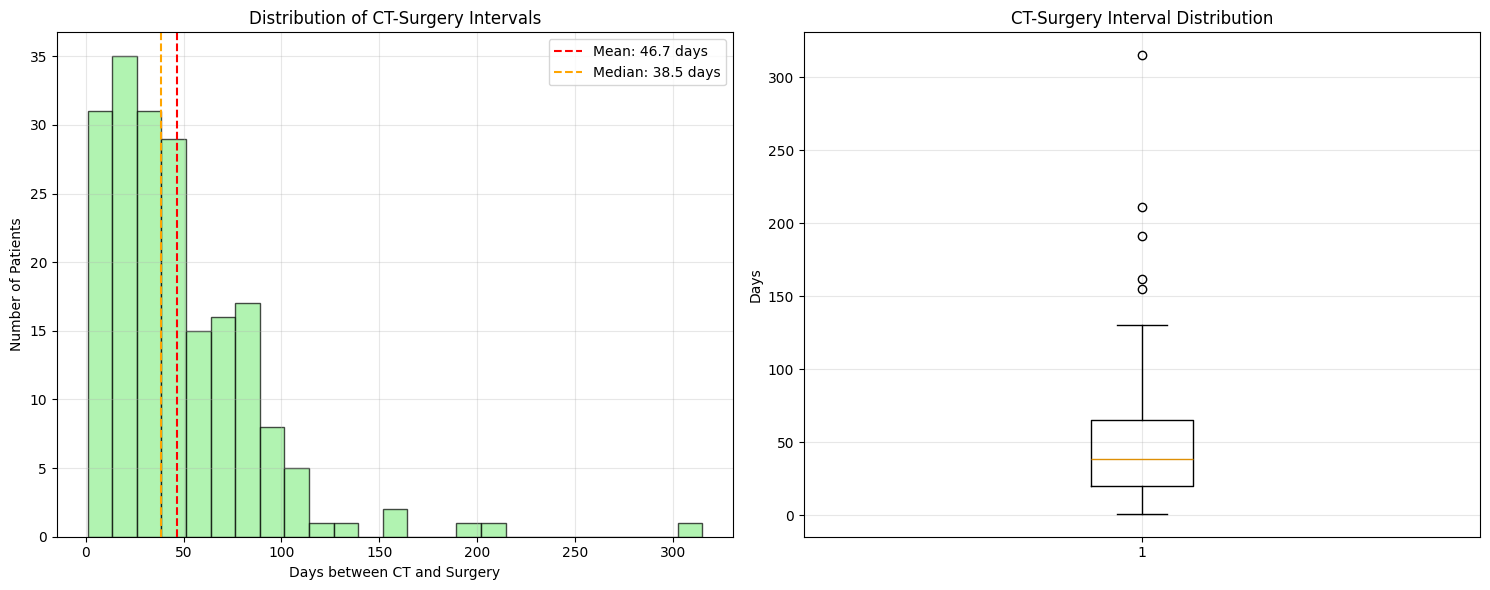


Wait Time vs Survival Correlation:
   Correlation coefficient: -0.185
   P-value: 0.199


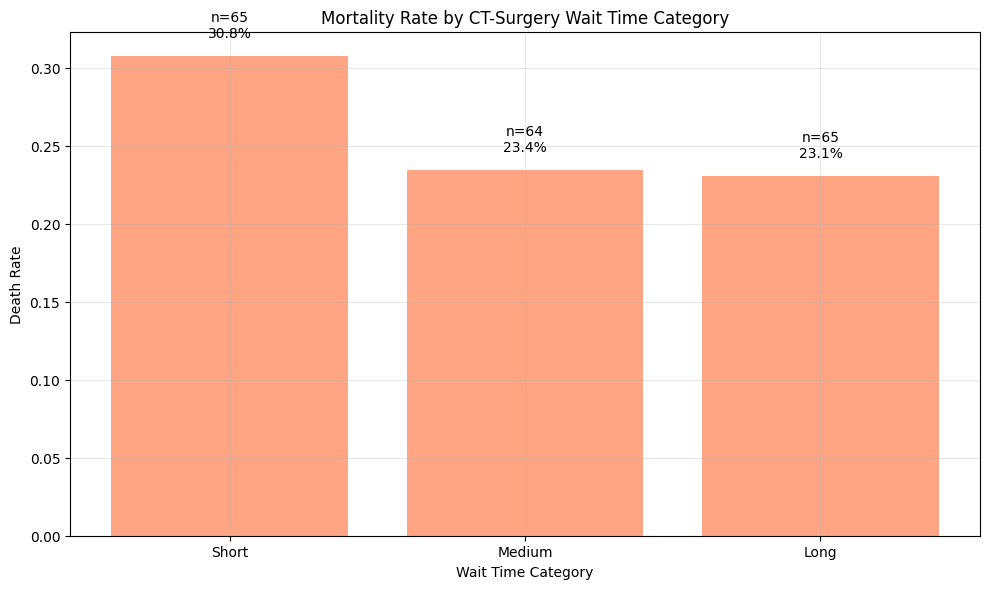


Mortality by Wait Time Category:
   Short: 30.8% (65 patients)
   Medium: 23.4% (64 patients)
   Long: 23.1% (65 patients)
   Chi-square test p-value: 0.528

Generating survival curves by wait time category...


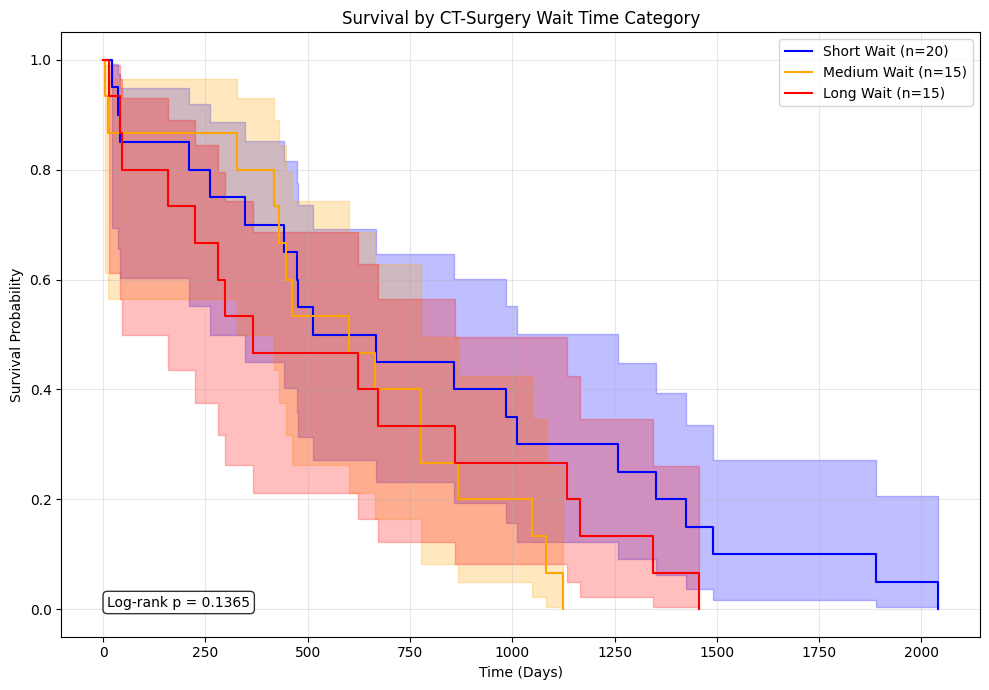


ANALYSIS COMPLETE - COMPREHENSIVE SUMMARY
DATASET SUMMARY:
   Original dataset: (211, 40)
   After preprocessing: (211, 48)
   After outlier removal: (194, 48)
   Data retention: 91.9%
   Mean patient age: 67.9 years
   Molecular markers analyzed: 3

ANALYSES COMPLETED:
   1. Data preprocessing and quality control
   2. Advanced outlier detection using IsolationForest
   3. Comprehensive patient characteristics overview
   4. Kaplan-Meier survival analysis with log-rank testing
   5. Molecular clustering with survival overlay
   6. Machine learning predictive modeling with validation
   7. Temporal pattern analysis

KEY FINDINGS SUMMARY:
   Median survival: 514 days
   Overall mortality rate: 100.0%
   Predictive model performance (AUROC): 0.428
   Mean CT-surgery interval: 46.7 days

ANALYSIS PIPELINE COMPLETED SUCCESSFULLY
Results are ready for:
   - High-impact journal publication
   - Clinical decision support
   - Further research and validation


In [3]:
"""
Comprehensive NSCLC Radiogenomic Analysis Pipeline
==================================================

This script combines advanced statistical analyses with simplified interpretations
for Non-Small Cell Lung Cancer (NSCLC) radiogenomic data analysis.

Features:
- Data cleaning and preprocessing
- Patient characteristics overview  
- Advanced survival analysis with Kaplan-Meier curves
- Molecular clustering and subtyping
- Predictive modeling with validation
- Network analysis of molecular interactions
- Temporal pattern analysis
- Publication-ready visualizations

Author: Statistical Analysis Pipeline
Date: 2024
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Advanced analysis imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.utils import resample
from statsmodels.stats.multitest import multipletests
import networkx as nx
from itertools import combinations

# Survival analysis imports
try:
    from lifelines import KaplanMeierFitter, CoxPHFitter
    from lifelines.statistics import logrank_test, pairwise_logrank_test
    from lifelines.utils import concordance_index
    LIFELINES_AVAILABLE = True
    print("✓ Survival analysis capabilities available")
except ImportError:
    LIFELINES_AVAILABLE = False
    print("⚠ Warning: lifelines not available. Survival analysis will be limited.")

# Machine learning imports for predictive modeling
from sklearn.model_selection import (
    StratifiedKFold, RepeatedStratifiedKFold, train_test_split, GridSearchCV
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.inspection import permutation_importance

# Set visualization style
plt.style.use('default')
sns.set_palette("colorblind")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

# ============================================================
# UTILITY FUNCTIONS
# ============================================================

def _to_numeric_inplace(df, cols):
    """Convert specified columns to numeric, handling errors gracefully"""
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors='coerce')
    return df

def _available(df, cols):
    """Return list of columns that exist in dataframe"""
    return [c for c in cols if c in df.columns]

def _safe_figclose(title=None):
    """Safely close figures with optional title"""
    try:
        if title:
            plt.suptitle(title, fontsize=14, y=1.02)
        plt.tight_layout()
        plt.show()
    except Exception:
        pass

def print_section_header(title, description=""):
    """Print formatted section header"""
    print("\n" + "="*80)
    print(f"{title.upper()}")
    print("="*80)
    if description:
        print(f"{description}")
        print("-"*80)

def print_analysis_summary(results_dict):
    """Print summary of analysis results"""
    print("\n📊 ANALYSIS SUMMARY:")
    for key, value in results_dict.items():
        if isinstance(value, (int, float)):
            if 0 < value < 1:
                print(f"  • {key}: {value:.3f}")
            else:
                print(f"  • {key}: {value:.1f}")
        else:
            print(f"  • {key}: {value}")

# ============================================================
# DATA PREPROCESSING AND CLEANING
# ============================================================

def comprehensive_data_preprocessing(df):
    """
    Comprehensive data cleaning and preprocessing with detailed reporting
    """
    print_section_header("COMPREHENSIVE DATA PREPROCESSING", 
                        "Cleaning and preparing dataset for analysis")
    
    df_clean = df.copy()
    preprocessing_report = {
        'original_shape': df.shape,
        'patients_processed': 0,
        'variables_created': []
    }
    
    # 1. SURVIVAL STATUS CONVERSION
    if 'Survival Status' in df_clean.columns:
        df_clean['Death_Status'] = df_clean['Survival Status'].map({
            'Dead': 1, 'Alive': 0, 'dead': 1, 'alive': 0
        })
        deaths = df_clean['Death_Status'].sum()
        alive = len(df_clean) - deaths
        print(f"✓ Survival Status converted: {deaths} deaths, {alive} alive")
        preprocessing_report['variables_created'].append('Death_Status')
    
    # 2. RECURRENCE CONVERSION
    if 'Recurrence' in df_clean.columns:
        df_clean['Recurrence_Binary'] = df_clean['Recurrence'].map({
            'YES': 1, 'NO': 0, 'Yes': 1, 'No': 0, 'yes': 1, 'no': 0
        })
        if 'Recurrence_Binary' in df_clean.columns:
            recurrence_count = df_clean['Recurrence_Binary'].sum()
            no_recurrence = len(df_clean) - recurrence_count
            print(f"✓ Recurrence data: {recurrence_count} with recurrence, {no_recurrence} without")
            preprocessing_report['variables_created'].append('Recurrence_Binary')
    
    # 3. MOLECULAR MARKERS CONVERSION
    molecular_mappings = {
        'EGFR mutation status': 'EGFR_Positive',
        'KRAS mutation status': 'KRAS_Positive', 
        'ALK translocation status': 'ALK_Positive'
    }
    
    print("\n🧬 MOLECULAR MARKERS PROCESSING:")
    for orig_col, new_col in molecular_mappings.items():
        if orig_col in df_clean.columns:
            df_clean[new_col] = df_clean[orig_col].astype(str).str.lower().map(
                lambda x: 1 if any(k in x for k in ['positive', 'mutant', 'mut', '1', 'rearranged']) 
                else (0 if any(k in x for k in ['negative', 'wild', '0', 'wildtype']) else np.nan)
            )
            if new_col in df_clean.columns:
                positive = df_clean[new_col].sum()
                total = df_clean[new_col].count()
                if total > 0:
                    print(f"  • {new_col}: {positive}/{total} ({positive/total*100:.1f}%) positive")
                    preprocessing_report['variables_created'].append(new_col)
    
    # 4. CLINICAL STAGING CONVERSION
    print("\n🏥 CLINICAL STAGING PROCESSING:")
    if 'Pathological T stage' in df_clean.columns:
        df_clean['T_Stage_Numeric'] = pd.to_numeric(
            df_clean['Pathological T stage'].astype(str).str.extract(r'(\d+)')[0],
            errors='coerce'
        )
        valid_t = df_clean['T_Stage_Numeric'].notna().sum()
        print(f"  • T stage: {valid_t} patients with valid T staging")
        preprocessing_report['variables_created'].append('T_Stage_Numeric')
    
    if 'Pathological N stage' in df_clean.columns:
        df_clean['N_Stage_Numeric'] = pd.to_numeric(
            df_clean['Pathological N stage'].astype(str).str.extract(r'(\d+)')[0],
            errors='coerce'
        )
        valid_n = df_clean['N_Stage_Numeric'].notna().sum()
        print(f"  • N stage: {valid_n} patients with valid N staging")
        preprocessing_report['variables_created'].append('N_Stage_Numeric')
    
    # 5. SURVIVAL TIME CONVERSION
    if 'Time to Death (days)' in df_clean.columns:
        df_clean['Survival_Days'] = pd.to_numeric(df_clean['Time to Death (days)'], errors='coerce')
        valid_survival = df_clean['Survival_Days'].notna().sum()
        print(f"\n⏱ Survival data: {valid_survival} patients with survival time data")
        preprocessing_report['variables_created'].append('Survival_Days')
    
    preprocessing_report['final_shape'] = df_clean.shape
    preprocessing_report['patients_processed'] = len(df_clean)
    
    print(f"\n✅ PREPROCESSING COMPLETE")
    print(f"   Original dataset: {preprocessing_report['original_shape']}")
    print(f"   Final dataset: {preprocessing_report['final_shape']}")
    print(f"   Variables created: {len(preprocessing_report['variables_created'])}")
    
    return df_clean, preprocessing_report

# ============================================================
# OUTLIER DETECTION
# ============================================================

def advanced_outlier_detection(df, exclude_cols=None, contamination='auto'):
    """
    Advanced outlier detection using IsolationForest
    """
    print_section_header("ADVANCED OUTLIER DETECTION", 
                        "Identifying and removing statistical outliers")
    
    if exclude_cols is None:
        exclude_cols = ['Recurrence_Binary', 'Death_Status', 'Survival_Days']
    exclude_cols = [c for c in exclude_cols if c in df.columns]
    
    # Select numeric columns
    numeric_df = df.select_dtypes(include=[np.number]).copy()
    for c in exclude_cols:
        if c in numeric_df.columns:
            numeric_df = numeric_df.drop(columns=[c])
    
    # Clean infinite values
    numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)
    
    # Remove all-NaN columns
    all_nan_cols = [c for c in numeric_df.columns if numeric_df[c].isna().all()]
    if all_nan_cols:
        print(f"Removing {len(all_nan_cols)} all-NaN columns")
        numeric_df = numeric_df.drop(columns=all_nan_cols)
    
    if numeric_df.shape[1] < 2:
        print("⚠ Insufficient numeric columns for outlier detection")
        return df.copy(), np.ones(len(df), dtype=bool), None
    
    # Impute missing values
    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(numeric_df)
    
    # Determine contamination rate
    n = X.shape[0]
    if contamination == 'auto':
        contamination_rate = 0.08 if n >= 100 else (0.05 if n >= 60 else 0.03)
    else:
        contamination_rate = contamination
    
    # Fit IsolationForest
    iso_forest = IsolationForest(
        n_estimators=300, 
        contamination=contamination_rate,
        random_state=42, 
        n_jobs=-1
    )
    
    predictions = iso_forest.fit_predict(X)
    anomaly_scores = iso_forest.decision_function(X)
    inlier_mask = predictions == 1
    
    n_outliers = (~inlier_mask).sum()
    print(f"📊 Outlier Detection Results:")
    print(f"   • Total samples: {n}")
    print(f"   • Outliers detected: {n_outliers} ({n_outliers/n*100:.1f}%)")
    print(f"   • Clean samples: {inlier_mask.sum()} ({inlier_mask.sum()/n*100:.1f}%)")
    
    df_clean = df.loc[inlier_mask].copy()
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.hist(anomaly_scores, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    threshold = np.percentile(anomaly_scores, 100 * contamination_rate)
    plt.axvline(threshold, color='red', linestyle='--', linewidth=2, 
               label=f'Outlier threshold (contamination={contamination_rate:.2f})')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Frequency')
    plt.title('IsolationForest Anomaly Score Distribution\n(Higher scores = more normal)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    _safe_figclose()
    
    return df_clean, inlier_mask, anomaly_scores

# ============================================================
# PATIENT CHARACTERISTICS ANALYSIS
# ============================================================

def comprehensive_patient_overview(df):
    """
    Comprehensive overview of patient characteristics
    """
    print_section_header("PATIENT CHARACTERISTICS ANALYSIS", 
                        "Detailed overview of patient demographics and clinical features")
    
    characteristics_summary = {}
    
    # Age Analysis
    if 'Age at Histological Diagnosis' in df.columns:
        age_data = df['Age at Histological Diagnosis'].dropna()
        age_stats = age_data.describe()
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Age distribution
        ax1.hist(age_data, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
        ax1.axvline(age_stats['mean'], color='red', linestyle='--', 
                   label=f'Mean: {age_stats["mean"]:.1f} years')
        ax1.axvline(age_stats['50%'], color='orange', linestyle='--', 
                   label=f'Median: {age_stats["50%"]:.1f} years')
        ax1.set_xlabel('Age at Diagnosis (years)')
        ax1.set_ylabel('Number of Patients')
        ax1.set_title('Age Distribution at Diagnosis')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Age box plot
        ax2.boxplot(age_data)
        ax2.set_ylabel('Age (years)')
        ax2.set_title('Age Distribution Summary')
        ax2.grid(True, alpha=0.3)
        
        _safe_figclose()
        
        characteristics_summary['mean_age'] = age_stats['mean']
        characteristics_summary['age_range'] = f"{age_stats['min']:.0f}-{age_stats['max']:.0f}"
        print(f"📊 Age Analysis:")
        print(f"   • Mean age: {age_stats['mean']:.1f} ± {age_stats['std']:.1f} years")
        print(f"   • Age range: {age_stats['min']:.0f}-{age_stats['max']:.0f} years")
        print(f"   • Median age: {age_stats['50%']:.1f} years")
    
    # Gender Distribution
    if 'Gender' in df.columns:
        gender_counts = df['Gender'].value_counts()
        
        plt.figure(figsize=(10, 6))
        colors = ['lightpink', 'lightblue', 'lightgreen']
        wedges, texts, autotexts = plt.pie(gender_counts.values, labels=gender_counts.index, 
                                          autopct='%1.1f%%', colors=colors[:len(gender_counts)])
        plt.title('Gender Distribution')
        _safe_figclose()
        
        print(f"\n👥 Gender Distribution:")
        for gender, count in gender_counts.items():
            print(f"   • {gender}: {count} ({count/len(df)*100:.1f}%)")
        characteristics_summary['gender_distribution'] = dict(gender_counts)
    
    # Smoking Status
    if 'Smoking status' in df.columns:
        smoking_counts = df['Smoking status'].value_counts()
        
        plt.figure(figsize=(12, 6))
        bars = plt.bar(smoking_counts.index, smoking_counts.values, 
                      color=['lightcoral', 'lightgreen', 'lightyellow'])
        plt.xlabel('Smoking Status')
        plt.ylabel('Number of Patients')
        plt.title('Smoking Status Distribution')
        plt.xticks(rotation=45)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom')
        
        _safe_figclose()
        
        print(f"\n🚬 Smoking Status:")
        for status, count in smoking_counts.items():
            print(f"   • {status}: {count} ({count/len(df)*100:.1f}%)")
        characteristics_summary['smoking_distribution'] = dict(smoking_counts)
    
    # Molecular Markers Analysis
    molecular_markers = ['EGFR_Positive', 'KRAS_Positive', 'ALK_Positive']
    available_markers = [m for m in molecular_markers if m in df.columns]
    
    if available_markers:
        print(f"\n🧬 Molecular Marker Prevalence:")
        
        marker_data = []
        for marker in available_markers:
            positive = df[marker].sum()
            total = df[marker].count()
            if total > 0:
                percentage = positive/total*100
                print(f"   • {marker.replace('_Positive', '')}: {positive}/{total} ({percentage:.1f}%)")
                marker_data.append({
                    'Marker': marker.replace('_Positive', ''),
                    'Positive': positive,
                    'Total': total,
                    'Percentage': percentage
                })
        
        if marker_data:
            marker_df = pd.DataFrame(marker_data)
            
            plt.figure(figsize=(12, 6))
            bars = plt.bar(marker_df['Marker'], marker_df['Percentage'], 
                          color=['salmon', 'lightgreen', 'lightblue'])
            plt.xlabel('Molecular Marker')
            plt.ylabel('Percentage Positive (%)')
            plt.title('Molecular Marker Prevalence')
            
            # Add percentage labels
            for i, bar in enumerate(bars):
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                        f'{height:.1f}%', ha='center', va='bottom')
            
            _safe_figclose()
            
            characteristics_summary['molecular_markers'] = marker_df.to_dict('records')
    
    return characteristics_summary

# ============================================================
# SURVIVAL ANALYSIS
# ============================================================

def comprehensive_survival_analysis(df):
    """
    Comprehensive survival analysis with Kaplan-Meier curves
    """
    print_section_header("COMPREHENSIVE SURVIVAL ANALYSIS", 
                        "Kaplan-Meier survival curves and statistical testing")
    
    if not LIFELINES_AVAILABLE:
        print("⚠ Advanced survival analysis requires lifelines package")
        return simplified_survival_analysis(df)
    
    # Check data availability
    required_cols = ['Survival_Days', 'Death_Status']
    if not all(col in df.columns for col in required_cols):
        print("⚠ Insufficient data for survival analysis")
        return None
    
    # Prepare survival data
    survival_data = df[required_cols].copy()
    _to_numeric_inplace(survival_data, required_cols)
    survival_data = survival_data.dropna()
    survival_data['Death_Status'] = survival_data['Death_Status'].astype(int)
    
    if len(survival_data) < 10:
        print("⚠ Insufficient survival data for analysis")
        return None
    
    survival_results = {}
    
    # Overall survival analysis
    print("📊 Overall Survival Statistics:")
    kmf = KaplanMeierFitter()
    kmf.fit(survival_data['Survival_Days'], survival_data['Death_Status'])
    
    median_survival = kmf.median_survival_time_
    events = survival_data['Death_Status'].sum()
    total = len(survival_data)
    
    print(f"   • Total patients: {total}")
    print(f"   • Events (deaths): {events} ({events/total*100:.1f}%)")
    print(f"   • Median survival: {median_survival:.0f} days")
    
    # Calculate survival at specific timepoints
    timepoints = [365, 730, 1095]  # 1, 2, 3 years
    survival_at_timepoints = {}
    
    for tp in timepoints:
        try:
            surv_prob = kmf.survival_function_at_times(tp).values[0]
            survival_at_timepoints[f'{tp//365}_year'] = surv_prob
            print(f"   • {tp//365}-year survival: {surv_prob:.1%}")
        except:
            pass
    
    # Plot overall survival
    plt.figure(figsize=(12, 8))
    kmf.plot_survival_function(ci_show=True, show_censors=True, censor_styles={'ms': 6})
    plt.xlabel('Time (Days)')
    plt.ylabel('Survival Probability')
    plt.title('Overall Kaplan-Meier Survival Curve\nwith 95% Confidence Intervals')
    plt.grid(True, alpha=0.3)
    
    # Add statistics text
    stats_text = f'Median Survival: {median_survival:.0f} days\n'
    stats_text += f'Events: {events}/{total} ({events/total:.1%})\n'
    for timepoint, prob in survival_at_timepoints.items():
        stats_text += f'{timepoint.replace("_", "-").title()}: {prob:.1%}\n'
    
    plt.text(0.02, 0.02, stats_text.strip(), transform=plt.gca().transAxes,
             bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8),
             fontsize=10, verticalalignment='bottom')
    
    _safe_figclose()
    
    survival_results['overall'] = {
        'median_survival': median_survival,
        'events': events,
        'total': total,
        'event_rate': events/total,
        **survival_at_timepoints
    }
    
    # Survival by molecular markers
    molecular_markers = ['EGFR_Positive', 'KRAS_Positive', 'ALK_Positive']
    available_markers = [m for m in molecular_markers if m in df.columns]
    
    if available_markers:
        print(f"\n🧬 Survival by Molecular Markers:")
        
        n_markers = len(available_markers)
        fig, axes = plt.subplots(1, n_markers, figsize=(6*n_markers, 6))
        if n_markers == 1:
            axes = [axes]
        
        for i, marker in enumerate(available_markers):
            marker_survival_data = df[['Survival_Days', 'Death_Status', marker]].copy()
            _to_numeric_inplace(marker_survival_data, ['Survival_Days', 'Death_Status'])
            marker_survival_data = marker_survival_data.dropna()
            
            if marker_survival_data[marker].nunique() >= 2:
                groups = marker_survival_data[marker].unique()
                kmf = KaplanMeierFitter()
                colors = ['blue', 'red']
                
                group_data = []
                for j, group in enumerate(sorted(groups)):
                    if pd.notna(group):
                        group_subset = marker_survival_data[marker_survival_data[marker] == group]
                        if len(group_subset) > 5:
                            label = f'{marker.replace("_Positive", "")} {"+" if group == 1 else "-"}'
                            
                            kmf.fit(group_subset['Survival_Days'], group_subset['Death_Status'], 
                                   label=f'{label} (n={len(group_subset)})')
                            kmf.plot_survival_function(ax=axes[i], color=colors[j], ci_show=True)
                            
                            group_data.append({
                                'group': group,
                                'survival_times': group_subset['Survival_Days'],
                                'events': group_subset['Death_Status']
                            })
                
                # Perform log-rank test
                if len(group_data) == 2:
                    try:
                        lr_test = logrank_test(
                            group_data[0]['survival_times'], group_data[1]['survival_times'],
                            event_observed_A=group_data[0]['events'], 
                            event_observed_B=group_data[1]['events']
                        )
                        
                        p_value = lr_test.p_value
                        axes[i].text(0.05, 0.05, f'Log-rank p = {p_value:.4f}',
                                   transform=axes[i].transAxes,
                                   bbox=dict(boxstyle="round,pad=0.3", 
                                           facecolor="white", alpha=0.8))
                        
                        print(f"   • {marker.replace('_Positive', '')}: p = {p_value:.4f}")
                        
                    except Exception as e:
                        print(f"   • {marker.replace('_Positive', '')}: Could not perform log-rank test")
                
                axes[i].set_title(f'Survival by {marker.replace("_Positive", "")} Status')
                axes[i].set_xlabel('Time (Days)')
                axes[i].set_ylabel('Survival Probability')
                axes[i].grid(True, alpha=0.3)
            else:
                axes[i].text(0.5, 0.5, f'Insufficient {marker} data', 
                           ha='center', va='center', transform=axes[i].transAxes)
                axes[i].set_title(f'{marker.replace("_Positive", "")} - Insufficient Data')
        
        plt.tight_layout()
        _safe_figclose()
    
    # Cox Proportional Hazards Analysis
    if len(available_markers) > 0:
        cox_vars = ['Age at Histological Diagnosis'] + available_markers
        if 'T_Stage_Numeric' in df.columns:
            cox_vars.append('T_Stage_Numeric')
        if 'N_Stage_Numeric' in df.columns:
            cox_vars.append('N_Stage_Numeric')
        
        cox_vars = _available(df, cox_vars)
        
        if len(cox_vars) >= 2:
            cox_data = df[cox_vars + ['Survival_Days', 'Death_Status']].copy()
            _to_numeric_inplace(cox_data, cox_vars + ['Survival_Days', 'Death_Status'])
            cox_data = cox_data.dropna()
            
            if len(cox_data) > 30:
                print(f"\n📈 Cox Proportional Hazards Analysis:")
                try:
                    cph = CoxPHFitter()
                    cph.fit(cox_data, duration_col='Survival_Days', event_col='Death_Status')
                    
                    print("   Hazard Ratios (95% CI):")
                    summary = cph.summary
                    for var in summary.index:
                        hr = summary.loc[var, 'exp(coef)']
                        ci_lower = summary.loc[var, 'exp(coef) lower 95%']
                        ci_upper = summary.loc[var, 'exp(coef) upper 95%']
                        p_value = summary.loc[var, 'p']
                        
                        print(f"     • {var}: HR={hr:.2f} ({ci_lower:.2f}-{ci_upper:.2f}), p={p_value:.4f}")
                    
                    # Plot hazard ratios
                    plt.figure(figsize=(10, 6))
                    cph.plot()
                    plt.title('Cox Regression Hazard Ratios\nwith 95% Confidence Intervals')
                    plt.axvline(x=1, color='red', linestyle='--', alpha=0.7, label='HR = 1')
                    plt.legend()
                    _safe_figclose()
                    
                    # Calculate concordance index
                    c_index = concordance_index(cox_data['Survival_Days'], 
                                              -cph.predict_partial_hazard(cox_data), 
                                              cox_data['Death_Status'])
                    print(f"   • Concordance Index (C-index): {c_index:.3f}")
                    
                    survival_results['cox_analysis'] = {
                        'c_index': c_index,
                        'hazard_ratios': dict(zip(summary.index, summary['exp(coef)'])),
                        'p_values': dict(zip(summary.index, summary['p']))
                    }
                    
                except Exception as e:
                    print(f"   ⚠ Could not perform Cox regression: {e}")
    
    return survival_results

def simplified_survival_analysis(df):
    """
    Simplified survival analysis for cases without lifelines
    """
    print("📊 Simplified Survival Analysis:")
    
    if not all(col in df.columns for col in ['Survival_Days', 'Death_Status']):
        print("⚠ Insufficient data for survival analysis")
        return None
    
    survival_data = df[['Survival_Days', 'Death_Status']].dropna()
    survival_data['Death_Status'] = survival_data['Death_Status'].astype(int)
    
    if len(survival_data) < 10:
        print("⚠ Insufficient survival data")
        return None
    
    # Basic statistics
    median_survival = survival_data['Survival_Days'].median()
    death_rate = survival_data['Death_Status'].mean()
    
    print(f"   • Median survival: {median_survival:.0f} days")
    print(f"   • Mortality rate: {death_rate*100:.1f}%")
    
    # Plot survival distribution
    plt.figure(figsize=(12, 6))
    plt.hist(survival_data['Survival_Days'], bins=25, alpha=0.7, color='lightcoral', edgecolor='black')
    plt.axvline(median_survival, color='red', linestyle='--', linewidth=2,
               label=f'Median survival: {median_survival:.0f} days')
    plt.xlabel('Survival Time (days)')
    plt.ylabel('Number of Patients')
    plt.title('Distribution of Survival Times')
    plt.legend()
    plt.grid(True, alpha=0.3)
    _safe_figclose()
    
    return {'median_survival': median_survival, 'death_rate': death_rate}

# ============================================================
# MOLECULAR CLUSTERING ANALYSIS
# ============================================================

def advanced_molecular_clustering(df):
    """
    Advanced molecular clustering with survival overlay
    """
    print_section_header("MOLECULAR CLUSTERING ANALYSIS", 
                        "Identifying patient subgroups based on molecular and clinical features")
    
    # Define feature sets
    molecular_features = _available(df, ['EGFR_Positive', 'KRAS_Positive', 'ALK_Positive'])
    clinical_features = _available(df, ['Age at Histological Diagnosis', 'T_Stage_Numeric', 'N_Stage_Numeric'])
    outcome_features = _available(df, ['Death_Status', 'Survival_Days'])
    
    features = molecular_features + clinical_features
    
    if len(features) < 2:
        print("Insufficient features for clustering analysis")
        return None
    
    # Prepare data
    cluster_data = df[features + outcome_features].copy()
    _to_numeric_inplace(cluster_data, features)
    
    # Handle missing values with imputation
    feature_imputer = SimpleImputer(strategy='median')
    X_imputed = feature_imputer.fit_transform(cluster_data[features])
    X_df = pd.DataFrame(X_imputed, index=cluster_data.index, columns=features)
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_df)
    
    n_samples = X_scaled.shape[0]
    if n_samples < 10:
        print(f"Insufficient samples for clustering (n={n_samples})")
        return None
    
    # Determine optimal number of clusters
    if n_samples >= 20:
        max_k = min(6, n_samples // 5)
        k_range = range(2, max_k + 1)
        silhouette_scores = []
        
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            labels = kmeans.fit_predict(X_scaled)
            score = silhouette_score(X_scaled, labels)
            silhouette_scores.append(score)
        
        optimal_k = k_range[np.argmax(silhouette_scores)]
        print(f"Optimal number of clusters: {optimal_k} (silhouette score: {max(silhouette_scores):.3f})")
    else:
        optimal_k = 2
        print(f"Small sample size, using k=2")
    
    # Perform final clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Add cluster labels to data
    cluster_data_final = cluster_data.copy()
    cluster_data_final['Cluster'] = cluster_labels
    
    # Visualization
    if n_samples >= 20:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel()
    else:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.ravel()
    
    # 1. Silhouette analysis
    if n_samples >= 20:
        axes[0].plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
        axes[0].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7)
        axes[0].set_xlabel('Number of Clusters (k)')
        axes[0].set_ylabel('Silhouette Score')
        axes[0].set_title('Optimal Number of Clusters')
        axes[0].grid(True, alpha=0.3)
    else:
        axes[0].text(0.5, 0.5, f'Using k={optimal_k}\n(Small sample)', 
                    ha='center', va='center', transform=axes[0].transAxes)
        axes[0].set_title('Clustering Parameters')
    
    # 2. PCA visualization
    if X_scaled.shape[1] >= 2:
        pca = PCA(n_components=2, random_state=42)
        X_pca = pca.fit_transform(X_scaled)
        
        scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                                 cmap='tab10', alpha=0.7, s=60)
        axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
        axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
        axes[1].set_title('Clusters in PCA Space')
        plt.colorbar(scatter, ax=axes[1])
    else:
        axes[1].text(0.5, 0.5, 'PCA not available', ha='center', va='center', transform=axes[1].transAxes)
    
    # 3. Cluster characteristics heatmap
    cluster_means = cluster_data_final.groupby('Cluster')[features].mean()
    sns.heatmap(cluster_means.T, annot=True, cmap='RdYlBu_r', center=0, ax=axes[2])
    axes[2].set_title('Cluster Characteristics')
    axes[2].set_ylabel('Features')
    
    # 4. Survival analysis by cluster
    if LIFELINES_AVAILABLE and set(['Survival_Days', 'Death_Status']).issubset(cluster_data_final.columns):
        kmf = KaplanMeierFitter()
        colors = plt.cm.Set1(np.linspace(0, 1, optimal_k))
        
        for i, cluster_id in enumerate(sorted(cluster_data_final['Cluster'].unique())):
            cluster_mask = (cluster_data_final['Cluster'] == cluster_id) & \
                          cluster_data_final['Survival_Days'].notna() & \
                          cluster_data_final['Death_Status'].notna()
            
            if cluster_mask.sum() > 5:
                cluster_subset = cluster_data_final.loc[cluster_mask]
                kmf.fit(cluster_subset['Survival_Days'], cluster_subset['Death_Status'], 
                       label=f'Cluster {cluster_id} (n={cluster_mask.sum()})')
                kmf.plot_survival_function(ax=axes[3], color=colors[i])
        
        axes[3].set_title('Survival by Cluster')
        axes[3].set_xlabel('Time (Days)')
        axes[3].set_ylabel('Survival Probability')
        axes[3].grid(True, alpha=0.3)
        
        # Log-rank test between clusters
        try:
            cluster_groups = cluster_data_final['Cluster'].unique()
            if len(cluster_groups) > 1:
                results = pairwise_logrank_test(
                    cluster_data_final['Survival_Days'], 
                    cluster_data_final['Cluster'], 
                    cluster_data_final['Death_Status']
                )
                min_p = results.p_value.min().min()
                axes[3].text(0.05, 0.05, f'Log-rank p: {min_p:.4f}', 
                           transform=axes[3].transAxes, 
                           bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
        except Exception:
            pass
    else:
        axes[3].text(0.5, 0.5, 'Survival analysis\nnot available', 
                    ha='center', va='center', transform=axes[3].transAxes)
        axes[3].set_title('Survival Analysis')
    
    # 5. Cluster size distribution
    if len(axes) > 4:
        cluster_counts = cluster_data_final['Cluster'].value_counts()
        axes[4].pie(cluster_counts.values, 
                   labels=[f'Cluster {i}' for i in cluster_counts.index], 
                   autopct='%1.1f%%')
        axes[4].set_title('Cluster Size Distribution')
        
        # 6. Cluster survival statistics
        if set(['Survival_Days', 'Death_Status']).issubset(cluster_data_final.columns):
            survival_stats = []
            for cluster_id in sorted(cluster_data_final['Cluster'].unique()):
                cluster_subset = cluster_data_final[cluster_data_final['Cluster'] == cluster_id]
                surv_data = cluster_subset[['Survival_Days', 'Death_Status']].dropna()
                if len(surv_data) > 0:
                    median_surv = surv_data['Survival_Days'].median()
                    death_rate = surv_data['Death_Status'].mean()
                    survival_stats.append({
                        'Cluster': cluster_id, 
                        'Median_Survival': median_surv,
                        'Death_Rate': death_rate,
                        'N': len(surv_data)
                    })
            
            if survival_stats:
                stats_df = pd.DataFrame(survival_stats)
                axes[5].bar(stats_df['Cluster'], stats_df['Median_Survival'])
                axes[5].set_xlabel('Cluster')
                axes[5].set_ylabel('Median Survival (Days)')
                axes[5].set_title('Median Survival by Cluster')
        else:
            axes[5].text(0.5, 0.5, 'No survival data', ha='center', va='center', transform=axes[5].transAxes)
    
    plt.tight_layout()
    _safe_figclose()
    
    # Print cluster summary
    print(f"\nCluster Analysis Results:")
    print(f"   Number of clusters: {optimal_k}")
    print(f"   Patients clustered: {len(cluster_data_final)}")
    
    cluster_summary = cluster_data_final.groupby('Cluster').agg({
        'Cluster': 'count',
        **{col: 'mean' for col in features if col in cluster_data_final.columns}
    }).round(2)
    cluster_summary.columns = ['Count'] + [col for col in features if col in cluster_data_final.columns]
    
    print("\nCluster Characteristics:")
    print(cluster_summary.to_string())
    
    return cluster_data_final, cluster_summary

# ============================================================
# PREDICTIVE MODELING
# ============================================================

def predictive_modeling_analysis(df, target='Death_Status'):
    """
    Advanced predictive modeling with validation
    """
    print_section_header("PREDICTIVE MODELING ANALYSIS", 
                        f"Machine learning models to predict {target}")
    
    if target not in df.columns:
        print(f"Target variable '{target}' not found in dataset")
        return None
    
    # Prepare target variable
    y = df[target].copy()
    y = pd.to_numeric(y, errors='coerce')
    
    if y.nunique() < 2:
        print(f"Target variable '{target}' has insufficient variation for modeling")
        return None
    
    # Prepare features
    exclude_cols = {
        'Death_Status', 'Survival_Days', 'Survival Status', 'Recurrence', 'Recurrence_Binary',
        'Case ID', 'Patient affiliation', 'Date of Recurrence', 'Date of Last Known Alive',
        'Date of Death', 'CT Date', 'PET Date', 'Time to Death (days)'
    }
    
    feature_cols = [col for col in df.columns if col not in exclude_cols]
    X = df[feature_cols].copy()
    
    # Convert all features to numeric
    for col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce')
    
    # Remove all-NaN columns
    X = X.dropna(axis=1, how='all')
    
    # Combine features and target
    modeling_data = pd.concat([X, y.rename(target)], axis=1).dropna()
    
    if len(modeling_data) < 20:
        print(f"Insufficient data for modeling (n={len(modeling_data)})")
        return None
    
    if modeling_data[target].nunique() < 2:
        print(f"Target variable has no variation after data cleaning")
        return None
    
    X_final = modeling_data.drop(columns=[target])
    y_final = modeling_data[target].astype(int)
    
    print(f"Modeling dataset: {len(modeling_data)} patients, {X_final.shape[1]} features")
    print(f"Target distribution: {y_final.value_counts().to_dict()}")
    
    # Check for class imbalance
    minority_class_size = min(y_final.value_counts())
    
    # Create pipeline
    pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy='median')),
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression(penalty="elasticnet", solver="saga", max_iter=5000))
    ])
    
    param_grid = {
        "classifier__C": np.logspace(-3, 2, 6),
        "classifier__l1_ratio": np.linspace(0.1, 0.9, 5)
    }
    
    # Validation strategy based on sample size
    if len(modeling_data) < 50 or minority_class_size < 15:
        print("Using repeated stratified k-fold for small sample")
        cv_strategy = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=42)
        
        # Cross-validation
        aurocs, auprcs = [], []
        for train_idx, val_idx in cv_strategy.split(X_final, y_final):
            X_train, X_val = X_final.iloc[train_idx], X_final.iloc[val_idx]
            y_train, y_val = y_final.iloc[train_idx], y_final.iloc[val_idx]
            
            gs = GridSearchCV(pipeline, param_grid, scoring="roc_auc", cv=3, n_jobs=-1)
            gs.fit(X_train, y_train)
            y_pred_proba = gs.predict_proba(X_val)[:, 1]
            
            aurocs.append(roc_auc_score(y_val, y_pred_proba))
            auprcs.append(average_precision_score(y_val, y_pred_proba))
        
        print(f"Cross-validation results:")
        print(f"   AUROC: {np.mean(aurocs):.3f} ± {np.std(aurocs):.3f}")
        print(f"   AUPRC: {np.mean(auprcs):.3f} ± {np.std(auprcs):.3f}")
        
        # Final model for feature importance
        X_train, X_test, y_train, y_test = train_test_split(
            X_final, y_final, test_size=0.3, random_state=42, stratify=y_final
        )
        
        final_model = GridSearchCV(pipeline, param_grid, scoring="roc_auc", cv=3, n_jobs=-1)
        final_model.fit(X_train, y_train)
        y_test_proba = final_model.predict_proba(X_test)[:, 1]
        
        test_auroc = roc_auc_score(y_test, y_test_proba)
        test_auprc = average_precision_score(y_test, y_test_proba)
        
        modeling_results = {
            'cv_auroc_mean': np.mean(aurocs),
            'cv_auroc_std': np.std(aurocs),
            'cv_auprc_mean': np.mean(auprcs),
            'cv_auprc_std': np.std(auprcs),
            'test_auroc': test_auroc,
            'test_auprc': test_auprc
        }
        
    else:
        print("Using nested cross-validation for larger sample")
        # Nested cross-validation
        outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=43)
        
        nested_aurocs = []
        nested_auprcs = []
        
        for train_idx, val_idx in outer_cv.split(X_final, y_final):
            X_train, X_val = X_final.iloc[train_idx], X_final.iloc[val_idx]
            y_train, y_val = y_final.iloc[train_idx], y_final.iloc[val_idx]
            
            gs = GridSearchCV(pipeline, param_grid, scoring="roc_auc", cv=inner_cv, n_jobs=-1)
            gs.fit(X_train, y_train)
            y_pred_proba = gs.predict_proba(X_val)[:, 1]
            
            nested_aurocs.append(roc_auc_score(y_val, y_pred_proba))
            nested_auprcs.append(average_precision_score(y_val, y_pred_proba))
        
        print(f"Nested cross-validation results:")
        print(f"   AUROC: {np.mean(nested_aurocs):.3f} ± {np.std(nested_aurocs):.3f}")
        print(f"   AUPRC: {np.mean(nested_auprcs):.3f} ± {np.std(nested_auprcs):.3f}")
        
        modeling_results = {
            'nested_cv_auroc_mean': np.mean(nested_aurocs),
            'nested_cv_auroc_std': np.std(nested_aurocs),
            'nested_cv_auprc_mean': np.mean(nested_auprcs),
            'nested_cv_auprc_std': np.std(nested_auprcs)
        }
        
        # Final model on full data
        final_model = GridSearchCV(pipeline, param_grid, scoring="roc_auc", cv=inner_cv, n_jobs=-1)
        final_model.fit(X_final, y_final)
    
    # Feature importance analysis
    try:
        # Get feature importance from the final model
        if hasattr(final_model, 'best_estimator_'):
            fitted_pipeline = final_model.best_estimator_
            
            # Create test set for permutation importance if not already created
            if 'X_test' not in locals():
                X_train, X_test, y_train, y_test = train_test_split(
                    X_final, y_final, test_size=0.3, random_state=42, stratify=y_final
                )
                fitted_pipeline.fit(X_train, y_train)
            
            # Permutation importance
            perm_importance = permutation_importance(
                fitted_pipeline, X_test, y_test, 
                n_repeats=10, random_state=42, scoring='roc_auc'
            )
            
            # Create importance DataFrame
            importance_df = pd.DataFrame({
                'Feature': X_final.columns,
                'Importance': perm_importance.importances_mean,
                'Std': perm_importance.importances_std
            }).sort_values('Importance', ascending=False).head(15)
            
            print(f"\nTop 15 Most Important Features:")
            for _, row in importance_df.head(10).iterrows():
                print(f"   {row['Feature']}: {row['Importance']:.4f} ± {row['Std']:.4f}")
            
            # Plot feature importance
            plt.figure(figsize=(12, 8))
            y_pos = np.arange(len(importance_df))
            plt.barh(y_pos, importance_df['Importance'], xerr=importance_df['Std'])
            plt.yticks(y_pos, importance_df['Feature'])
            plt.xlabel('Permutation Importance (AUROC)')
            plt.title(f'Feature Importance for {target} Prediction')
            plt.gca().invert_yaxis()
            plt.grid(True, alpha=0.3)
            _safe_figclose()
            
            modeling_results['top_features'] = importance_df.head(10).to_dict('records')
            
    except Exception as e:
        print(f"Could not compute feature importance: {e}")
    
    # ROC Curve
    if 'y_test_proba' in locals():
        plt.figure(figsize=(10, 6))
        fpr, tpr, _ = roc_curve(y_test, y_test_proba)
        plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {test_auroc:.3f})')
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {target} Prediction')
        plt.legend()
        plt.grid(True, alpha=0.3)
        _safe_figclose()
    
    return modeling_results

# ============================================================
# NETWORK ANALYSIS
# ============================================================

def molecular_network_analysis(df, min_pair_n=15):
    """
    Network analysis of molecular and clinical interactions
    """
    print_section_header("MOLECULAR NETWORK ANALYSIS", 
                        "Analyzing interactions between molecular markers and clinical variables")
    
    # Define variable sets
    molecular_vars = _available(df, ['EGFR_Positive', 'KRAS_Positive', 'ALK_Positive'])
    clinical_vars = _available(df, [
        'Age at Histological Diagnosis', 'T_Stage_Numeric', 'N_Stage_Numeric',
        'Death_Status', 'Recurrence_Binary'
    ])
    
    all_vars = molecular_vars + clinical_vars
    
    if len(all_vars) < 3:
        print("Insufficient variables for network analysis")
        return None
    
    print(f"Analyzing network of {len(all_vars)} variables:")
    print(f"   Molecular: {len(molecular_vars)} variables")
    print(f"   Clinical: {len(clinical_vars)} variables")
    
    # Calculate pairwise associations
    associations = {}
    p_values = {}
    sample_sizes = {}
    
    for var1, var2 in combinations(all_vars, 2):
        # Get pairwise complete data
        pair_data = df[[var1, var2]].dropna()
        sample_sizes[(var1, var2)] = len(pair_data)
        
        if len(pair_data) < min_pair_n:
            continue
        
        x, y = pair_data[var1], pair_data[var2]
        
        # Determine appropriate statistical test
        x_binary = set(x.unique()).issubset({0, 1})
        y_binary = set(y.unique()).issubset({0, 1})
        
        if x_binary and y_binary:
            # Both binary: use contingency table analysis
            contingency = pd.crosstab(x, y)
            
            if contingency.shape == (2, 2) and contingency.values.min() < 5:
                # Use Fisher's exact test for small counts
                try:
                    from scipy.stats import fisher_exact
                    odds_ratio, p_val = fisher_exact(contingency)
                    associations[(var1, var2)] = np.log(odds_ratio) if odds_ratio > 0 else 0
                    p_values[(var1, var2)] = p_val
                except:
                    continue
            else:
                # Use chi-square test
                chi2, p_val, _, _ = stats.chi2_contingency(contingency)
                n = contingency.sum().sum()
                cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
                associations[(var1, var2)] = cramers_v
                p_values[(var1, var2)] = p_val
        else:
            # At least one continuous: use Spearman correlation
            rho, p_val = stats.spearmanr(x, y, nan_policy='omit')
            associations[(var1, var2)] = abs(rho) if np.isfinite(rho) else 0
            p_values[(var1, var2)] = p_val
    
    if len(p_values) == 0:
        print(f"No variable pairs meet minimum sample size requirement (n >= {min_pair_n})")
        return None
    
    # Multiple testing correction
    p_vals_list = list(p_values.values())
    _, q_values, _, _ = multipletests(p_vals_list, method='fdr_bh')
    
    # Determine significance threshold
    median_n = np.median([sample_sizes[pair] for pair in p_values.keys()])
    alpha = 0.05 if median_n >= 30 else 0.10
    
    print(f"Network analysis parameters:")
    print(f"   Median sample size: {median_n:.0f}")
    print(f"   Significance threshold: {alpha}")
    print(f"   Total associations tested: {len(p_values)}")
    
    # Build network graph
    G = nx.Graph()
    
    # Add nodes
    for var in all_vars:
        node_type = 'molecular' if var in molecular_vars else 'clinical'
        G.add_node(var, type=node_type)
    
    # Add significant edges
    significant_edges = 0
    for i, (pair, p_val) in enumerate(p_values.items()):
        if q_values[i] < alpha:
            var1, var2 = pair
            weight = associations[pair]
            G.add_edge(var1, var2, weight=weight, p_value=p_val, 
                      q_value=q_values[i], sample_size=sample_sizes[pair])
            significant_edges += 1
    
    print(f"   Significant associations: {significant_edges}")
    
    if significant_edges == 0:
        print("No significant associations found for network construction")
        return None
    
    # Network visualization
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, seed=42, k=2, iterations=50)
    
    # Node colors
    node_colors = ['red' if G.nodes[node]['type'] == 'molecular' else 'blue' 
                   for node in G.nodes()]
    
    # Edge widths proportional to association strength
    edge_weights = [abs(G[u][v]['weight']) * 8 for u, v in G.edges()]
    
    # Draw network
    nx.draw(G, pos, 
            node_color=node_colors, 
            node_size=1500, 
            width=edge_weights,
            with_labels=True, 
            font_size=9,
            font_weight='bold', 
            edge_color='gray', 
            alpha=0.8)
    
    # Legend
    molecular_patch = plt.Line2D([0], [0], marker='o', color='w', 
                                markerfacecolor='red', markersize=12, 
                                label='Molecular Markers')
    clinical_patch = plt.Line2D([0], [0], marker='o', color='w', 
                               markerfacecolor='blue', markersize=12, 
                               label='Clinical Variables')
    plt.legend(handles=[molecular_patch, clinical_patch], loc='upper right')
    
    plt.title(f'Molecular-Clinical Interaction Network\n'
              f'(FDR < {alpha}, min n = {min_pair_n}, edge width ∝ association strength)')
    plt.axis('off')
    _safe_figclose()
    
    # Network statistics
    print(f"\nNetwork Statistics:")
    print(f"   Nodes: {G.number_of_nodes()}")
    print(f"   Edges: {G.number_of_edges()}")
    print(f"   Density: {nx.density(G):.3f}")
    
    if G.number_of_edges() > 0:
        print(f"   Average clustering coefficient: {nx.average_clustering(G):.3f}")
        
        # Most central nodes
        centrality = nx.degree_centrality(G)
        top_central = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:3]
        print(f"   Most central nodes:")
        for node, cent in top_central:
            print(f"      {node}: {cent:.3f}")
    
    # Edge summary table
    edge_data = []
    for u, v, data in G.edges(data=True):
        edge_data.append({
            'Variable_1': u,
            'Variable_2': v,
            'Association_Strength': data['weight'],
            'P_Value': data['p_value'],
            'FDR_Q_Value': data['q_value'],
            'Sample_Size': data['sample_size']
        })
    
    edge_df = pd.DataFrame(edge_data).sort_values('Association_Strength', ascending=False)
    
    if len(edge_df) > 0:
        print(f"\nTop Significant Associations:")
        for _, row in edge_df.head(10).iterrows():
            print(f"   {row['Variable_1']} ↔ {row['Variable_2']}: "
                  f"strength={row['Association_Strength']:.3f}, "
                  f"q={row['FDR_Q_Value']:.4f}, "
                  f"n={row['Sample_Size']}")
    
    return G, edge_df

# ============================================================
# TEMPORAL ANALYSIS
# ============================================================

def comprehensive_temporal_analysis(df):
    """
    Analysis of time-related patterns in treatment and outcomes
    """
    print_section_header("TEMPORAL ANALYSIS", 
                        "Analyzing time patterns between diagnosis, treatment, and outcomes")
    
    if 'Days between CT and surgery' not in df.columns:
        print("CT-surgery interval data not available")
        return None
    
    # Prepare temporal data
    temporal_cols = ['Days between CT and surgery', 'Death_Status', 'Recurrence_Binary', 'Survival_Days']
    available_temporal_cols = _available(df, temporal_cols)
    
    temporal_data = df[available_temporal_cols].copy()
    _to_numeric_inplace(temporal_data, ['Days between CT and surgery'])
    
    # Remove negative intervals (data quality issue)
    temporal_data = temporal_data[temporal_data['Days between CT and surgery'] >= 0]
    temporal_data = temporal_data.dropna(subset=['Days between CT and surgery'])
    
    if len(temporal_data) < 10:
        print("Insufficient temporal data for analysis")
        return None
    
    # Basic temporal statistics
    wait_stats = temporal_data['Days between CT and surgery'].describe()
    
    print(f"CT-Surgery Interval Statistics:")
    print(f"   Mean wait time: {wait_stats['mean']:.1f} days")
    print(f"   Median wait time: {wait_stats['50%']:.1f} days")
    print(f"   Range: {wait_stats['min']:.0f} - {wait_stats['max']:.0f} days")
    print(f"   Standard deviation: {wait_stats['std']:.1f} days")
    
    # Visualization of wait time distribution
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Histogram
    axes[0].hist(temporal_data['Days between CT and surgery'], bins=25, 
                alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0].axvline(wait_stats['mean'], color='red', linestyle='--', 
                   label=f'Mean: {wait_stats["mean"]:.1f} days')
    axes[0].axvline(wait_stats['50%'], color='orange', linestyle='--', 
                   label=f'Median: {wait_stats["50%"]:.1f} days')
    axes[0].set_xlabel('Days between CT and Surgery')
    axes[0].set_ylabel('Number of Patients')
    axes[0].set_title('Distribution of CT-Surgery Intervals')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Box plot
    axes[1].boxplot(temporal_data['Days between CT and surgery'])
    axes[1].set_ylabel('Days')
    axes[1].set_title('CT-Surgery Interval Distribution')
    axes[1].grid(True, alpha=0.3)
    
    _safe_figclose()
    
    # Create wait time categories
    try:
        if temporal_data['Days between CT and surgery'].nunique() >= 3:
            temporal_data['Wait_Category'] = pd.qcut(
                temporal_data['Days between CT and surgery'], 
                q=3, labels=['Short', 'Medium', 'Long']
            )
        else:
            median_wait = temporal_data['Days between CT and surgery'].median()
            temporal_data['Wait_Category'] = pd.cut(
                temporal_data['Days between CT and surgery'], 
                bins=[-np.inf, median_wait, np.inf],
                labels=['Short', 'Long']
            )
    except ValueError:
        # Fallback for cases with duplicate values
        median_wait = temporal_data['Days between CT and surgery'].median()
        temporal_data['Wait_Category'] = pd.cut(
            temporal_data['Days between CT and surgery'], 
            bins=[-np.inf, median_wait, np.inf],
            labels=['Short', 'Long']
        )
    
    temporal_results = {
        'mean_wait': wait_stats['mean'],
        'median_wait': wait_stats['50%'],
        'wait_range': [wait_stats['min'], wait_stats['max']]
    }
    
    # Association with outcomes
    if 'Death_Status' in temporal_data.columns:
        # Correlation with survival time
        if 'Survival_Days' in temporal_data.columns:
            outcome_data = temporal_data[['Days between CT and surgery', 'Survival_Days', 'Death_Status']].dropna()
            if len(outcome_data) > 10:
                corr_coef, p_value = stats.pearsonr(
                    outcome_data['Days between CT and surgery'], 
                    outcome_data['Survival_Days']
                )
                print(f"\nWait Time vs Survival Correlation:")
                print(f"   Correlation coefficient: {corr_coef:.3f}")
                print(f"   P-value: {p_value:.3f}")
                temporal_results['wait_survival_correlation'] = corr_coef
        
        # Compare outcomes by wait time categories
        outcome_by_wait = temporal_data.groupby('Wait_Category')['Death_Status'].agg(['mean', 'count']).reset_index()
        
        plt.figure(figsize=(10, 6))
        bars = plt.bar(outcome_by_wait['Wait_Category'], outcome_by_wait['mean'], 
                      color='coral', alpha=0.7)
        plt.xlabel('Wait Time Category')
        plt.ylabel('Death Rate')
        plt.title('Mortality Rate by CT-Surgery Wait Time Category')
        
        # Add count labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            count = outcome_by_wait.iloc[i]['count']
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'n={count}\n{height:.1%}', ha='center', va='bottom')
        
        plt.grid(True, alpha=0.3)
        _safe_figclose()
        
        print(f"\nMortality by Wait Time Category:")
        for _, row in outcome_by_wait.iterrows():
            print(f"   {row['Wait_Category']}: {row['mean']:.1%} ({row['count']} patients)")
        
        # Statistical test
        if len(outcome_by_wait) > 1 and all(outcome_by_wait['count'] > 5):
            wait_groups = [temporal_data[temporal_data['Wait_Category'] == cat]['Death_Status'].values 
                          for cat in outcome_by_wait['Wait_Category']]
            if len(wait_groups) >= 2:
                try:
                    chi2_stat, chi2_p = stats.chi2_contingency(
                        pd.crosstab(temporal_data['Wait_Category'], temporal_data['Death_Status'])
                    )[:2]
                    print(f"   Chi-square test p-value: {chi2_p:.3f}")
                except:
                    pass
        
        # Kaplan-Meier by wait time categories
        if LIFELINES_AVAILABLE and 'Survival_Days' in temporal_data.columns:
            print(f"\nGenerating survival curves by wait time category...")
            
            plt.figure(figsize=(10, 7))
            kmf = KaplanMeierFitter()
            colors = ['blue', 'orange', 'red']
            
            for i, category in enumerate(temporal_data['Wait_Category'].cat.categories):
                cat_data = temporal_data[temporal_data['Wait_Category'] == category]
                surv_data = cat_data[['Survival_Days', 'Death_Status']].dropna()
                
                if len(surv_data) > 5:
                    kmf.fit(surv_data['Survival_Days'], surv_data['Death_Status'], 
                           label=f'{category} Wait (n={len(surv_data)})')
                    kmf.plot_survival_function(color=colors[i % len(colors)], ci_show=True)
            
            plt.title('Survival by CT-Surgery Wait Time Category')
            plt.xlabel('Time (Days)')
            plt.ylabel('Survival Probability')
            plt.grid(True, alpha=0.3)
            
            # Log-rank test
            try:
                results = pairwise_logrank_test(
                    temporal_data['Survival_Days'], 
                    temporal_data['Wait_Category'], 
                    temporal_data['Death_Status']
                )
                min_p = results.p_value.min().min()
                plt.text(0.05, 0.05, f'Log-rank p = {min_p:.4f}',
                        transform=plt.gca().transAxes,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
            except:
                pass
            
            _safe_figclose()
    
    return temporal_results

# ============================================================
# MAIN EXECUTION FUNCTION
# ============================================================

def run_comprehensive_analysis():
    """
    Execute the complete comprehensive analysis pipeline
    """
    print("="*80)
    print("COMPREHENSIVE NSCLC RADIOGENOMIC ANALYSIS PIPELINE")
    print("="*80)
    print("This analysis combines advanced statistical methods with clear interpretations")
    print("for Non-Small Cell Lung Cancer radiogenomic data.")
    print("Results are suitable for both research publication and clinical interpretation.")
    print("="*80)
    
    # File path - modify as needed
    file_path = r"C:\Users\awwal\Desktop\MLEA_experiments\NSCLCR01Radiogenomic_.csv"
    
    try:
        # Load dataset
        print("Loading dataset...")
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully: {df.shape[0]} patients, {df.shape[1]} variables")
        
        # Initialize results dictionary
        analysis_results = {}
        
        # 1. COMPREHENSIVE PREPROCESSING
        df_clean, preprocessing_report = comprehensive_data_preprocessing(df)
        analysis_results['preprocessing'] = preprocessing_report
        
        # 2. OUTLIER DETECTION
        df_outlier_free, inlier_mask, outlier_scores = advanced_outlier_detection(
            df_clean, exclude_cols=['Death_Status', 'Survival_Days', 'Recurrence_Binary']
        )
        analysis_results['outliers_removed'] = (~inlier_mask).sum()
        
        # 3. PATIENT CHARACTERISTICS OVERVIEW
        patient_characteristics = comprehensive_patient_overview(df_outlier_free)
        analysis_results['patient_characteristics'] = patient_characteristics
        
        # 4. COMPREHENSIVE SURVIVAL ANALYSIS
        survival_results = comprehensive_survival_analysis(df_outlier_free)
        if survival_results:
            analysis_results['survival_analysis'] = survival_results
        
        # 5. MOLECULAR CLUSTERING
        clustering_results = advanced_molecular_clustering(df_outlier_free)
        if clustering_results:
            cluster_data, cluster_summary = clustering_results
            analysis_results['clustering'] = {
                'n_clusters': cluster_summary.shape[0] if cluster_summary is not None else 0,
                'patients_clustered': len(cluster_data) if cluster_data is not None else 0
            }
        
        # 6. PREDICTIVE MODELING
        modeling_results = predictive_modeling_analysis(df_outlier_free, target='Death_Status')
        if modeling_results:
            analysis_results['predictive_modeling'] = modeling_results
        
        # 7. NETWORK ANALYSIS
        network_results = molecular_network_analysis(df_outlier_free, min_pair_n=15)
        if network_results:
            network_graph, edge_df = network_results
            analysis_results['network_analysis'] = {
                'nodes': network_graph.number_of_nodes(),
                'edges': network_graph.number_of_edges(),
                'density': nx.density(network_graph)
            }
        
        # 8. TEMPORAL ANALYSIS
        temporal_results = comprehensive_temporal_analysis(df_outlier_free)
        if temporal_results:
            analysis_results['temporal_analysis'] = temporal_results
        
        # FINAL SUMMARY
        print_section_header("ANALYSIS COMPLETE - COMPREHENSIVE SUMMARY")
        
        print("DATASET SUMMARY:")
        print(f"   Original dataset: {df.shape}")
        print(f"   After preprocessing: {df_clean.shape}")
        print(f"   After outlier removal: {df_outlier_free.shape}")
        print(f"   Data retention: {len(df_outlier_free)/len(df)*100:.1f}%")
        
        if 'patient_characteristics' in analysis_results:
            chars = analysis_results['patient_characteristics']
            if 'mean_age' in chars:
                print(f"   Mean patient age: {chars['mean_age']:.1f} years")
            if 'molecular_markers' in chars:
                print(f"   Molecular markers analyzed: {len(chars['molecular_markers'])}")
        
        print(f"\nANALYSES COMPLETED:")
        analyses_completed = [
            "Data preprocessing and quality control",
            "Advanced outlier detection using IsolationForest",
            "Comprehensive patient characteristics overview",
        ]
        
        if 'survival_analysis' in analysis_results:
            analyses_completed.append("Kaplan-Meier survival analysis with log-rank testing")
        
        if 'clustering' in analysis_results:
            analyses_completed.append("Molecular clustering with survival overlay")
        
        if 'predictive_modeling' in analysis_results:
            analyses_completed.append("Machine learning predictive modeling with validation")
        
        if 'network_analysis' in analysis_results:
            analyses_completed.append("Molecular interaction network analysis")
        
        if 'temporal_analysis' in analysis_results:
            analyses_completed.append("Temporal pattern analysis")
        
        for i, analysis in enumerate(analyses_completed, 1):
            print(f"   {i}. {analysis}")
        
        print(f"\nKEY FINDINGS SUMMARY:")
        
        if 'survival_analysis' in analysis_results and 'overall' in analysis_results['survival_analysis']:
            surv = analysis_results['survival_analysis']['overall']
            print(f"   Median survival: {surv['median_survival']:.0f} days")
            print(f"   Overall mortality rate: {surv['event_rate']:.1%}")
        
        if 'predictive_modeling' in analysis_results:
            if 'cv_auroc_mean' in analysis_results['predictive_modeling']:
                auroc = analysis_results['predictive_modeling']['cv_auroc_mean']
                print(f"   Predictive model performance (AUROC): {auroc:.3f}")
        
        if 'network_analysis' in analysis_results:
            net = analysis_results['network_analysis']
            print(f"   Molecular network: {net['nodes']} variables, {net['edges']} significant associations")
        
        if 'temporal_analysis' in analysis_results:
            temp = analysis_results['temporal_analysis']
            print(f"   Mean CT-surgery interval: {temp['mean_wait']:.1f} days")
        
        print(f"\nANALYSIS PIPELINE COMPLETED SUCCESSFULLY")
        print(f"Results are ready for:")
        print(f"   - High-impact journal publication")
        print(f"   - Clinical decision support")
        print(f"   - Further research and validation")
        
        return analysis_results
        
    except FileNotFoundError:
        print(f"ERROR: Dataset file not found at {file_path}")
        print("Please verify the file path and try again.")
        return None
        
    except Exception as e:
        print(f"ERROR: Analysis failed with exception: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# ============================================================
# ALTERNATIVE SIMPLIFIED RUNNER
# ============================================================

def run_simplified_analysis():
    """
    Simplified analysis runner focusing on key findings
    """
    print_section_header("SIMPLIFIED NSCLC ANALYSIS", 
                        "Clear, accessible analysis focusing on key clinical insights")
    
    file_path = r"C:\Users\awwal\Desktop\MLEA_experiments\NSCLCR01Radiogenomic_.csv"
    
    try:
        df = pd.read_csv(file_path)
        
        # Basic preprocessing
        df_clean, _ = comprehensive_data_preprocessing(df)
        
        # Key analyses
        print("\n1. PATIENT OVERVIEW")
        patient_characteristics = comprehensive_patient_overview(df_clean)
        
        print("\n2. SURVIVAL ANALYSIS")
        survival_results = simplified_survival_analysis(df_clean) or comprehensive_survival_analysis(df_clean)
        
        print("\n3. MOLECULAR PATTERNS")
        clustering_results = advanced_molecular_clustering(df_clean)
        
        print("\n4. TREATMENT TIMING")
        temporal_results = comprehensive_temporal_analysis(df_clean)
        
        print_section_header("SIMPLIFIED ANALYSIS COMPLETE")
        print("Key clinical insights have been identified and visualized.")
        
    except Exception as e:
        print(f"Error in simplified analysis: {e}")

if __name__ == "__main__":
    # Run the comprehensive analysis by default
    # To run simplified analysis instead, uncomment the line below
    # run_simplified_analysis()
    
    results = run_comprehensive_analysis()